In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1) + k2 * (x2 - x1)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1)) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1./2.
y1 = 0.0
x2 = -1./2.
y2 = 7./10.

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 800

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs3.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

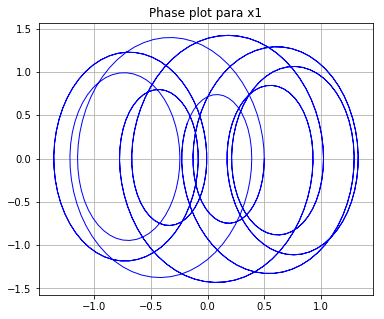

In [7]:
# Plot the solution that was generated
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
%matplotlib inline 
t, x1, xy, x2, y2 = loadtxt('two_springs3.dat', unpack=True)

figure(1, figsize=(6, 5))
lw=1
plot(x1,xy, 'b', linewidth=lw)
title("Phase plot para x1")
grid(True)
savefig("resortes2.3.1.png", dpi=200)

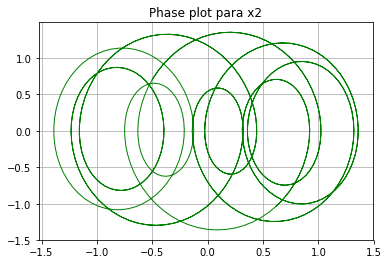

In [8]:
plot(x2,y2, 'g', linewidth=lw)
grid(True)
title("Phase plot para x2")
savefig("resortes2.3.2.png", dpi=100)

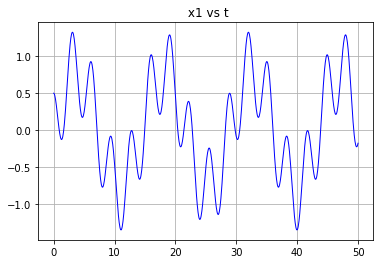

In [9]:
plot(t, x1, 'b', linewidth=lw)
grid(True)
title(" x1 vs t")
savefig("resortes2.3.3.png", dpi=100)

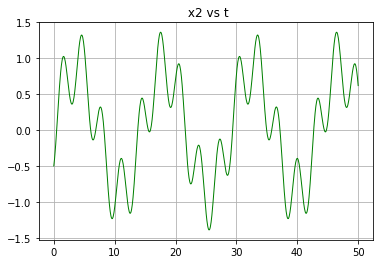

In [10]:
plot(t, x2, 'g', linewidth=lw)
grid(True)
title(" x2 vs t")
savefig("resortes2.3.4.png", dpi=100)

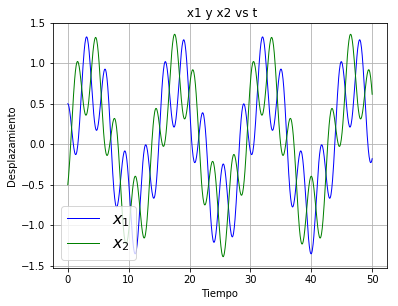

In [11]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
%matplotlib inline 
t, x1, xy, x2, y2 = loadtxt('two_springs3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

plt.xlabel('Tiempo')
plt.ylabel("Desplazamiento")
grid(True)
#hold(True)
lw = 1
#plot.xlim([0,20])
plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title(' x1 y x2 vs t')
savefig('resortes2.3.5.png', dpi=100)

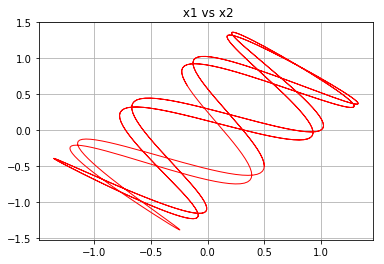

In [14]:
plot(x1,x2,'r', linewidth=lw)
grid(True)
title(" x1 vs x2")
savefig("resortes2.3.6.png", dpi=100)